In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba.posseg as psg


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [7]:
reviews = pd.read_csv(r'D:\Crawler\51job\供应链-1-clean-只看月薪.csv', encoding='gb18030')

In [8]:
print(reviews.shape)
reviews.head()

(615, 17)


,职位名称,公司名称,薪酬,城市地区,学历要求,工作经验要求,公司福利,公司标签,职位描述或任职要求,规模类型,地区,*n薪,最低年薪,最高年薪,薪酬_n,月薪最小值,月薪最大值
0,供应链总监,北京农顺物流管理科技有限公司,2.5-3.5万,北京-丰台区,本科,8-9年经验,五险一金,交通/运输/物流,农批行业类型供应链工作经验，主要为冷库/冷链物流园区供销服务。,民营 | 少于50人,北京,NaN,NaN,NaN,25000-35000,25000.0,35000.0
1,供应链主管/专员,迪卡侬上海生产采购中心,1.5-2万,青岛,本科,3-4年经验,五险一金,服装/纺织/皮革,30%基本日常工作：?负责运动产品的注塑类产品、油压类产品的生产供应链相关工作，如泳帽、蛙鞋...,外资（欧美） | 150-500人,青岛,NaN,NaN,NaN,15000-20000,15000.0,20000.0
2,供应链经理,长沙艾高信息科技有限公司,1-2万,长沙-岳麓区,本科,2年经验,五险,计算机软件,职位描述1、供应链专业咨询顾问。为公司供应链产品提供专业咨询顾问工作，完善供应商的开发，维护...,民营 | 少于50人,长沙,NaN,NaN,NaN,10000-20000,10000.0,20000.0
3,供应链主管,华伟达餐饮控股（深圳）有限公司,8千-1.5万,深圳-福田区,大专,3-4年经验,专业培训,餐饮业,工作职责：1、负责供应链的管理/统筹（仓库、物料…）2、不定时回访，解决加盟商问题，负责协调...,民营 | 150-500人,深圳,NaN,NaN,NaN,8000-15000,8000.0,15000.0
4,业务经理（物流以及供应链管理方向,佑仁电子科技（苏州）有限公司,1-1.5万,苏州-工业园区,本科,5-7年经验,餐饮补贴,计算机服务(系统、数据服务、维修),1.物流以及供应链管理，经济管理或相关专业***统招本科以上学历（含本科）2.5年以上供应链...,外资（非欧美） | 150-500人,苏州,NaN,NaN,NaN,10000-15000,10000.0,15000.0


In [9]:
content = reviews['职位描述或任职要求']

In [10]:
content

0                        农批行业类型供应链工作经验，主要为冷库/冷链物流园区供销服务。
1      30%基本日常工作：?负责运动产品的注塑类产品、油压类产品的生产供应链相关工作，如泳帽、蛙鞋...
2      职位描述1、供应链专业咨询顾问。为公司供应链产品提供专业咨询顾问工作，完善供应商的开发，维护...
3      工作职责：1、负责供应链的管理/统筹（仓库、物料…）2、不定时回访，解决加盟商问题，负责协调...
4      1.物流以及供应链管理，经济管理或相关专业***统招本科以上学历（含本科）2.5年以上供应链...
                             ...                        
610    岗位职责:KeyResponsibilities1.Performfinancialmont...
611    Main？Position？Tasks:To？coordinate/work？with？de...
612    供应链服务专员–苏州JobFamily:SCM-Procurement/SupplyChai...
613    1、ResponsibleforconfirmingandvalidatingBUpurch...
614    岗位职责:JobdescriptionTheSourcingResearchAnalysti...
Name: 职位描述或任职要求, Length: 615, dtype: object

In [11]:
strinfo = re.compile('[0-9a-zA-Z]|职位描述|岗位职责|任职要求|职位描述及要求|工作职责|岗位要求|精通|熟悉|负责|开发|工作|节假日|经验|相关|能力|福利|公司|优先')
content = content.apply(lambda x: strinfo.sub('',x))

In [12]:
worker = lambda s: [(x.word, x.flag) for x in psg.cut(s)] # 自定义简单分词函数
seg_word = content.apply(worker)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.025 seconds.
Prefix dict has been built successfully.


In [13]:
seg_word.head()

0    [(农批, n), (行业, n), (类型, n), (供应链, n), (，, x), ...
1    [(%, x), (基本, n), (日常, d), (：, x), (?, x), (运动...
2    [(、, x), (供应链, n), (专业, n), (咨询, vn), (顾问, nr)...
3    [(：, x), (、, x), (供应链, n), (的, uj), (管理, vn), ...
4    [(., x), (物流, n), (以及, c), (供应链, n), (管理, vn),...
Name: 职位描述或任职要求, dtype: object

In [14]:
type(seg_word)
type(list(seg_word))

list

In [15]:
# 将词语转为数据框形式，一列是词，一列是词语所在的句子ID，最后一列是词语在该句子的位置
n_word = seg_word.apply(lambda x: len(x))  # 每一评论中词的个数

n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(list(n_content), [])
# seg_word = list(seg_word)

In [16]:
seg_word = sum(seg_word, [])
# 词性
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]

# content_type = [[x]*y for x,y in zip(list(reviews['content_type']), list(n_word))]
# # 评论类型
# content_type = sum(content_type, [])

result = pd.DataFrame({"index_content":index_content,
                       "word":word,
                       "nature":nature,
                       # "content_type":content_type
                       })

In [17]:
# 删除标点符号
result = result[result['nature'] != 'x']  # x表示标点符号

# 删除停用词
stop_path = open(r"D:\DL_Homework\NLP\Data\电商产品评论数据情感分析\stoplist.txt",encoding='UTF-8')
stop = stop_path.readlines()
stop = [x.replace('\n', '') for x in stop]
word = list(set(word) - set(stop))
result = result[result['word'].isin(word)]

In [18]:
result.head()

,index_content,word,nature
0,1,农批,n
1,1,行业,n
2,1,类型,n
3,1,供应链,n
7,1,冷库,n


In [19]:
# 构造各词在对应评论的位置列
n_word = list(result.groupby(by = ['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]
# 词语在该评论的位置
index_word = sum(index_word, [])
# 合并评论id
result['index_word'] = index_word

result.head()

,index_content,word,nature,index_word
0,1,农批,n,0
1,1,行业,n,1
2,1,类型,n,2
3,1,供应链,n,3
7,1,冷库,n,4


In [20]:
# # 提取含有名词类的评论,即词性含有“n”的评论
# ind_n = result[['n' in x for x in result['nature']]]['index_content'].unique()
# result_n = result[[x in ind_n for x in result['index_content']]]
# result_n.head()

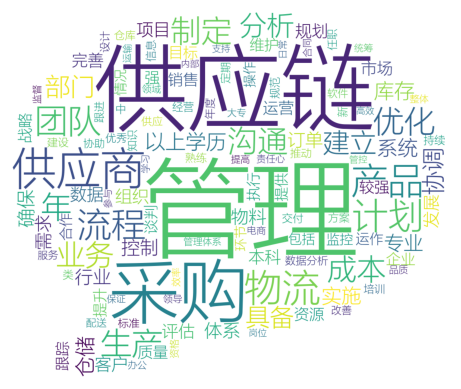

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

frequencies = result.groupby('word')['word'].count()
frequencies = frequencies.sort_values(ascending = False)
backgroud_Image=plt.imread('D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\pl.jpg')

# 自己上传中文字体到kesci
font_path = 'D:\DL_Homework\\NLP\Data\电商产品评论数据情感分析\MSYHL.TTC'
wordcloud = WordCloud(font_path=font_path, # 设置字体，不设置就会出现乱码
                      max_words=120,
                      background_color='white',
                      mask=backgroud_Image)# 词云形状

my_wordcloud = wordcloud.fit_words(frequencies)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()